# __Neural Networks in Scikit-Learn__

_Note: Scikit-Learn is not intended for use in large-scale Deep Learning projects._ <br>
It does, however, offer the required functionality to build simple DL models, such as the Multi-layer Perceptron (MLP), which we will use here.

In [223]:
%matplotlib inline  
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

Import the sklearn Classifier based on the MLP algorithm

In [224]:
from sklearn.neural_network import MLPClassifier

Generate some tricky data!

In [225]:
X, y = make_moons(n_samples = 500, noise = 0.2, random_state = 101)

Split the data into training and test sets

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

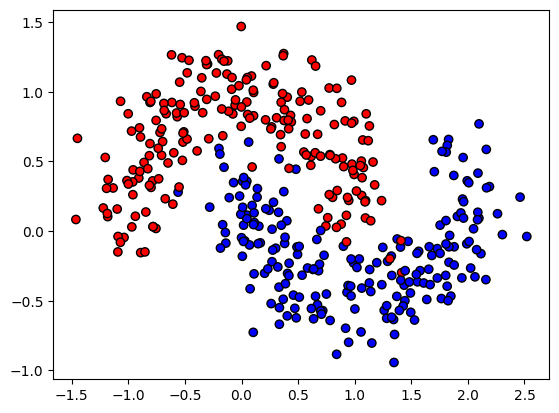

In [227]:
# visualisation
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train, edgecolors='k', cmap = cm_bright)

__Logistic regression__

First we will attempt to model this data with a Logistic Regression model.

We now want to train a neural network model to classify red and blue points based on their coordinates.

In [228]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4, hidden_layer_sizes=(5,2), random_state=1)
clf.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

# Give some facts

In [229]:
clf.score(X_test,y_test)

0.99

In [230]:
clf.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [231]:
clf.predict_proba(X_test)

array([[1.00000000e+000, 6.09254785e-076],
       [1.00000000e+000, 1.19325551e-191],
       [2.21517241e-007, 9.99999778e-001],
       [9.89884500e-001, 1.01155002e-002],
       [1.00000000e+000, 3.57113990e-206],
       [9.99679996e-001, 3.20003743e-004],
       [9.99773881e-001, 2.26118600e-004],
       [1.00000000e+000, 3.67946406e-070],
       [9.57915482e-001, 4.20845180e-002],
       [9.98430183e-001, 1.56981722e-003],
       [9.99315009e-001, 6.84990693e-004],
       [1.00000000e+000, 2.23013325e-152],
       [1.00000000e+000, 2.03253134e-104],
       [8.31721500e-003, 9.91682785e-001],
       [7.72568870e-001, 2.27431130e-001],
       [9.93663729e-001, 6.33627125e-003],
       [9.61878288e-001, 3.81217124e-002],
       [1.00000000e+000, 6.02570332e-023],
       [2.37631470e-009, 9.99999998e-001],
       [2.10795874e-008, 9.99999979e-001],
       [1.00000000e+000, 5.97028652e-185],
       [4.13464433e-003, 9.95865356e-001],
       [9.99484588e-001, 5.15412264e-004],
       [1.7

In [232]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix

#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(clf.predict(X_test), y_test)
cm

array([[51,  1],
       [ 0, 48]])

__Visualise model boundaries__ _Note: this is not a prediction, but shows how the feature space is divided into classes._

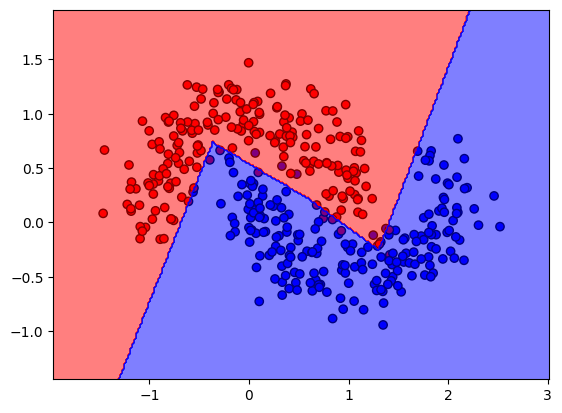

In [233]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], X_train[:,1], c = y_train.ravel(), edgecolors='k', cmap = cm_bright)
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = 0.02 # step in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_binary = Z>=0.5
Z_binary = Z_binary.reshape(xx.shape)
ax.contourf(xx, yy, Z_binary, cmap=cm_bright, alpha=.5)
plt.show()

Use a `seaborn` heatmap to display the confusion matrix.

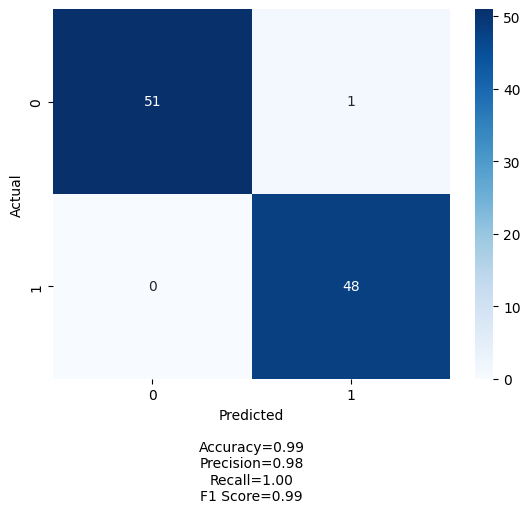

In [234]:
import seaborn as sn
accuracy  = np.trace(cm) / float(np.sum(cm))
precision = cm[1,1] / sum(cm[:,1])
recall    = cm[1,1] / sum(cm[1,:])
f1_score  = 2*precision*recall / (precision + recall)
stats_text = "\n\nAccuracy={:0.2f}\nPrecision={:0.2f}\nRecall={:0.2f}\nF1 Score={:0.2f}".format(
                accuracy,precision,recall,f1_score)
sn.heatmap(cm, annot=True, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted' + stats_text)
plt.show()

__Have a play:__ change the _alpha_ and _hidden_layer_sizes_ hyperparameters in the MLPClassifier declaration.<br>
`alpha=1e-4` - try values from 1, 1e-1, 1e-2... to 1e-7 and check the effect on the prediction probabilities, the model boundaries and the confusion matrix.<br>
`hidden_layer_sizes=(5,2)` - this means "use two hidden layers, the first with 5 units and the second with 2 units" - try one to three layers with 1 to 10 units per layer. Look at the effects as above. Also look out for convergence warnings as the number of parameters increases.
